# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("nhanes_2015_2016.csv")

In [99]:
print("Column names :", df.columns)

Column names : Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [100]:
# insert your code here
df["DMDMARTLX"] = df.DMDMARTL.map({1: "Married",
                                2: "Widowed",
                                3: "Divorced",	
                                4: "Separated",
                                5: "Never married",
                                6: "Living with partner",
                                77: "Refused",
                                99: "Don't Know"})

In [101]:
df.DMDMARTLX.head()

0                Married
1               Divorced
2                Married
3    Living with partner
4               Divorced
Name: DMDMARTLX, dtype: object

In [102]:
#fill in blanks or NaNs with the 'Missing' label
df.DMDMARTLX = df.DMDMARTLX.fillna('Missing')

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

In [103]:
#unpivoted table
df.groupby("RIAGENDR")["DMDMARTLX"].value_counts()

RIAGENDR  DMDMARTLX          
1         Married                1477
          Never married           484
          Living with partner     265
          Divorced                229
          Missing                 135
          Widowed                 100
          Separated                68
          Refused                   1
2         Married                1303
          Never married           520
          Divorced                350
          Widowed                 296
          Living with partner     262
          Missing                 126
          Separated               118
          Refused                   1
Name: DMDMARTLX, dtype: int64

### Marital Status by Gender

In [104]:
#pivot table
dMaritalByGender = df.groupby("RIAGENDR")["DMDMARTLX"].value_counts().unstack()
#find proportion/percentage for each column
dMaritalByGender = dMaritalByGender.apply(lambda x: x/x.sum() * 100, axis=0)
print(dMaritalByGender.to_string(float_format = '%.2f'))

DMDMARTLX  Divorced  Living with partner  Married  Missing  Never married  Refused  Separated  Widowed
RIAGENDR                                                                                              
1             39.55                50.28    53.13    51.72          48.21    50.00      36.56    25.25
2             60.45                49.72    46.87    48.28          51.79    50.00      63.44    74.75


__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

In [40]:
dMF30_40 = df[(df.RIDAGEYR >= 30) & (df.RIDAGEYR <= 40)]

### Marital Status by Gender (Between 30 and 40 years of age)

In [106]:
dMaritalByGender30_40 = dMF30_40.groupby("RIAGENDR")["DMDMARTLX"].value_counts().unstack()
dMaritalByGender30_40 = dMaritalByGender30_40.apply(lambda x: x/x.sum() * 100, axis = 0)
print(dMaritalByGender30_40.to_string(float_format = '%.2f'))

DMDMARTLX  Divorced  Living with partner  Married  Never married  Refused  Separated  Widowed
RIAGENDR                                                                                     
1             34.29                54.55    49.11          46.54   100.00      40.00    60.00
2             65.71                45.45    50.89          53.46      NaN      60.00    40.00


__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [107]:
df.RIDAGEYR.describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

In [108]:
df.DMDMARTLX.isnull().sum()

0

In [109]:
# insert your code here
dFemales = df[df.RIAGENDR == 2]

#https://pandas.pydata.org/docs/reference/api/pandas.cut.html
dFemales["AGEGRP"] = pd.cut(dFemales.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])

#Fill NAs in the "AGEGRP" column
#ValueError: fill value must be in categories
#https://stackoverflow.com/questions/53664948/pandas-fillna-throws-valueerror-fill-value-must-be-in-categories
dFemales["AGEGRP"] = dFemales["AGEGRP"].cat.add_categories('Missing')
dFemales["AGEGRP"] = dFemales["AGEGRP"].fillna('Missing')
# dFemales.AGEGRP = dFemales.AGEGRP.fillna('Missing')

print('# NULL values in the AGEGRP column :', dFemales["AGEGRP"].isnull().sum())
print('# NULL values in the DMDMARTLX column :', dFemales["DMDMARTLX"].isnull().sum())

# dFemales["DMDMARTLX"] = dFemales["DMDMARTLX"].cat.add_categories('Missing')
dFemales["DMDMARTLX"] = dFemales["DMDMARTLX"].fillna('Missing')
print('# NULL values in the DMDMARTLX column after fillna :', dFemales["DMDMARTLX"].isnull().sum())

# NULL values in the AGEGRP column : 0
# NULL values in the DMDMARTLX column : 0
# NULL values in the DMDMARTLX column after fillna : 0


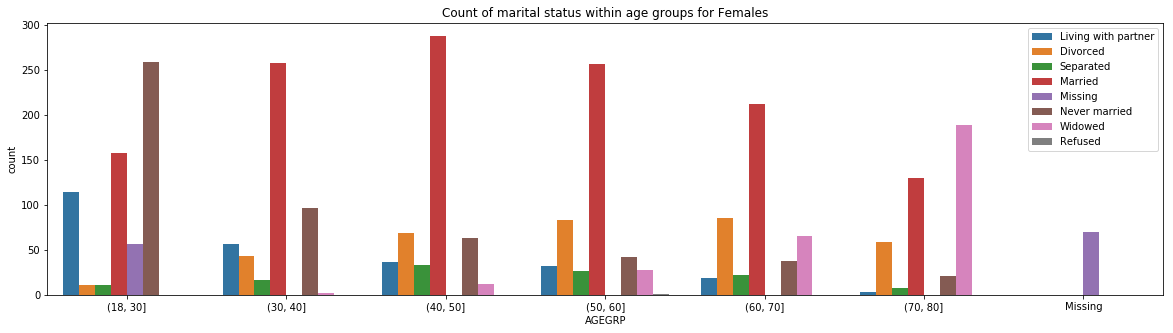

In [110]:
# stackoverflow.com/questions/54233996/matplotlib-multiple-lines-plot/54234188
# plt.plot(x = 'AGEGRP', 
#          y = 'DMDMARTLX',
#          data = dFemales)
# plt.plot('AGEGRP', 'DMDMARTLX', data = dFemales)


#https://seaborn.pydata.org/generated/seaborn.countplot.html
# countFMaritalStatus =  sns.countplot(x = 'AGEGRP',
#                                      y = 'DMDMARTLX'
#                                      data = dFemales)
plt.figure(figsize=(20, 5))
countFMaritalStatus =  sns.countplot(x = dFemales.AGEGRP,
                                     hue = dFemales.DMDMARTLX)
countFMaritalStatus.set_title('Count of marital status within age groups for Females')
plt.legend(loc='upper right')

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [117]:
dMales = df[df.RIAGENDR == 1]

#fill NA values in dMales["AGEGRP"]
dMales["AGEGRP"] = pd.cut(dMales.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
print('Count of NA in AGEGRP column', dMales["AGEGRP"].isnull().sum())
print('Count of NA in DMDMARTLX column', dMales["DMDMARTLX"].isnull().sum())
# dMales["AGEGRP"] = dMales["AGEGRP"].fillna('Missing')
# ValueError: fill value must be in categories

# Remember to use cat.add_categories to add a 'category'
# then fillna('valueUWant')
dMales["AGEGRP"] = dMales["AGEGRP"].cat.add_categories('Missing')
dMales["AGEGRP"] = dMales["AGEGRP"].fillna('Missing')
print('Count of NA in AGEGRP column after fillna', dMales["AGEGRP"].isnull().sum())
print('Count of NA in DMDMARTLX column', dMales["DMDMARTLX"].isnull().sum())
# there are no 'NA' values in the DMDMARTLX column for Males => so dont need to fillna like we did for the Females dataset


Count of NA in AGEGRP column 63
Count of NA in DMDMARTLX column 0
Count of NA in AGEGRP column after fillna 0
Count of NA in DMDMARTLX column 0


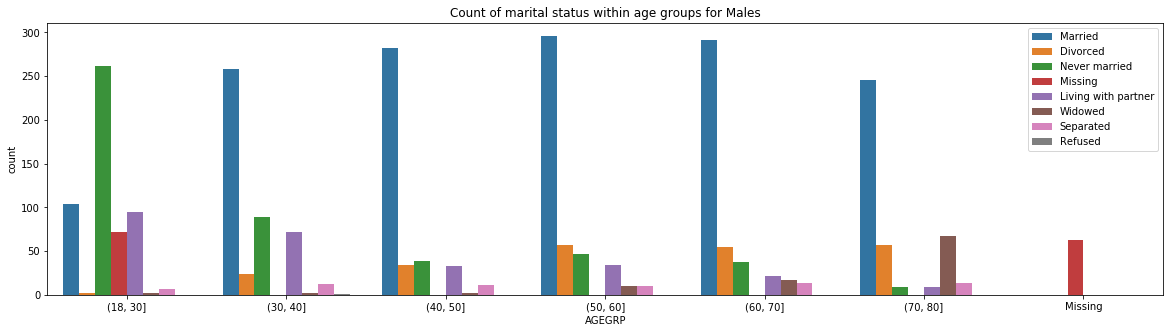

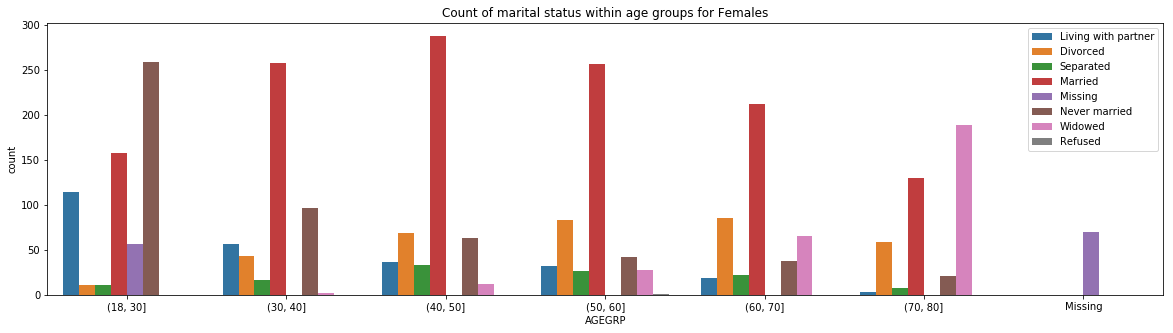

In [141]:
# insert your code here
#Males
# plt.subplots(2, 1, figsize=(20,5))
plt.figure(figsize = (20,5))
countMMaritalStatus =  sns.countplot(x = 'AGEGRP',
                                     hue = 'DMDMARTLX',
                                     data = dMales)


countMMaritalStatus.set_title('Count of marital status within age groups for Males')
plt.legend(loc = 'upper right')


#Females
plt.figure(figsize=(20, 5))
countFMaritalStatus =  sns.countplot(x = dFemales.AGEGRP,
                                     hue = dFemales.DMDMARTLX)
countFMaritalStatus.set_title('Count of marital status within age groups for Females')
plt.legend(loc='upper right')

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

In [152]:
# insert your code here
print('Count of NA in BMXHT Height column :', df["BMXHT"].isnull().sum())
#originally there were 62 NAs
# df["BMXHT"] = df["BMXHT"].fillna('Missing')
df["BMXHT"] = df["BMXHT"].replace('Missing', 0)
print('Count of NA in BMXHT Height column after fillna:', df["BMXHT"].isnull().sum())


Count of NA in BMXHT Height column : 0
Count of NA in BMXHT Height column after fillna: 0


In [158]:
print('Count of 0s in BMXHT Height column after fillna:', np.sum([df["BMXHT"] == 0]))


Count of 0s in BMXHT Height column after fillna: 62


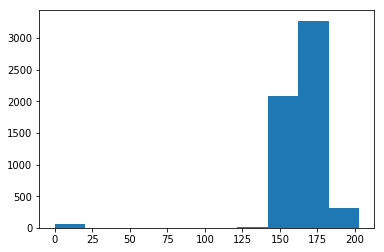

In [159]:
plt.hist(df.BMXHT)
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

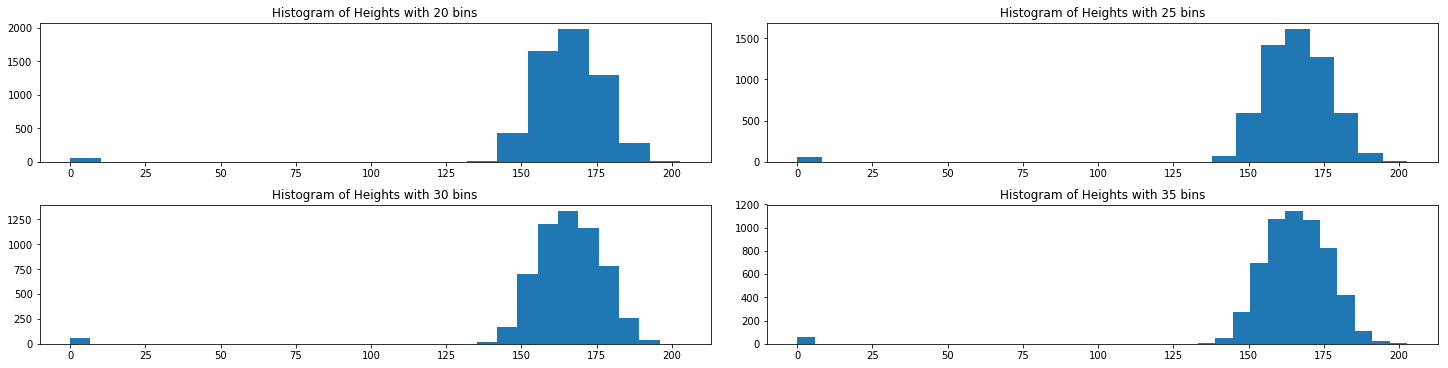

In [199]:
bin_list = [20, 25, 30, 35]

f, ax = plt.subplots(2, 2, figsize=(20,5), constrained_layout=True)
#space between subplots
#https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib
# f.tight_layout()

i = 0
j = 0

for b in bin_list:
    ax[i, j].hist(df.BMXHT, bins = b)
    title = "Histogram of Heights with " + str(b) + " bins"
    #plt.title(title, loc = 'left') only gave 1 final title
    #stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
    ax[i, j].title.set_text(title)
    
    j += 1
    if j == 2:
        #move to the next row
        i += 1
        #reset back to the 1st col
        j = 0
           

plt.show()

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

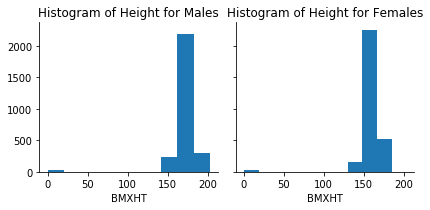

In [203]:
# insert your code here
#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(df, col = "RIAGENDR")
g = g.map(plt.hist, "BMXHT")
# g.set_titles('Histogram of Height for Males', 'Histogram of Height for Females')

#stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
axes = g.axes.flatten()
axes[0].set_title("Histogram of Height for Males")
axes[1].set_title("Histogram of Height for Females")
plt.show()


In [37]:
df["GENDER"] = df["RIAGENDR"].map({1: 'Male', 2:'Female'})
print('Count of NAs in GENDER column', df["GENDER"].isnull().sum())

Count of NAs in GENDER column 0


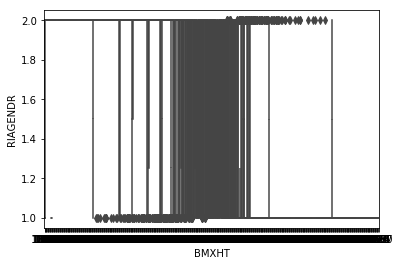

In [211]:
sns.boxplot(x = df["BMXHT"], y = df["RIAGENDR"])
plt.show()

#this method gives a weird boxplot because 'RIAGENDER' values are treated as continuous values

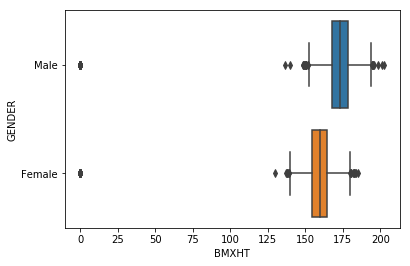

In [213]:
sns.boxplot(x = df["BMXHT"], y = df["GENDER"])
plt.show()

#this boxplot shows the spread of male and female heights properly

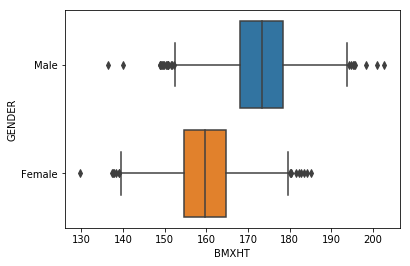

In [214]:
dfNonZeroHeight = df[df["BMXHT"] != 0]
sns.boxplot(x = dfNonZeroHeight["BMXHT"], y = dfNonZeroHeight["GENDER"])
plt.show()

#this boxplot shows the spread of male and female heights properly

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

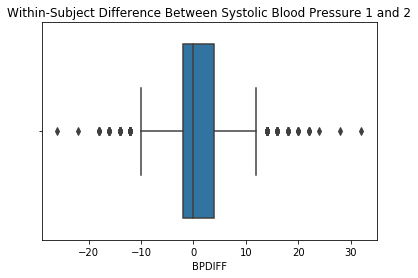

In [222]:
# insert your code here
df["BPDIFF"] = df.BPXSY1 - df.BPXSY2
sns.boxplot(x = df["BPDIFF"]).set_title('Within-Subject Difference Between Systolic Blood Pressure 1 and 2')
plt.show()


__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [230]:
# insert your code here
dfLowerSecondBP = df["BPDIFF"] < 0
print('Proportion of subjects with a lower SBP on the second reading compared to the first :', '{:10.2f}'.format(dfLowerSecondBP.sum()/dfLowerSecondBP.count()*100), '%') 

Proportion of subjects with a lower SBP on the second reading compared to the first :      34.12 %


__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

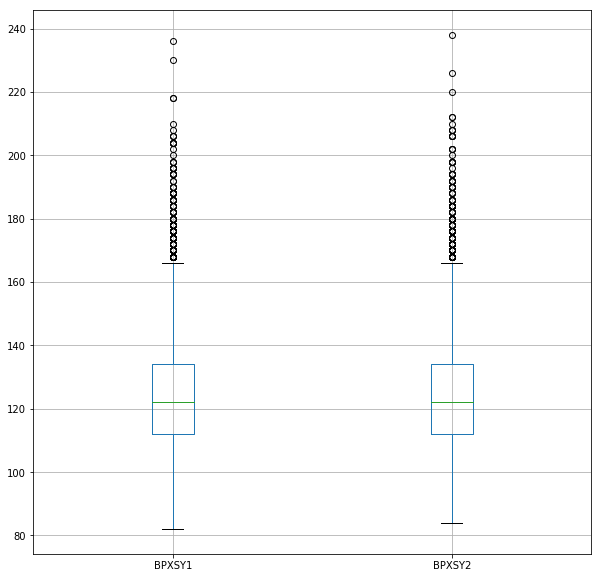

In [251]:
# insert your code here
# f, ax = plt.subplots(nrows = 1, ncols = 2, sharey = True)
# ax[0, 0].boxplot(x = df["BPXSY1"]).set_title('Systolic Blood Pressure 1')
# ax[0, 1].boxplot(x = df["BPXSY2"]).set_title('Systolic Blood Pressure 2')

# plt.figure(figsize=(20, 10))
# boxplot = df.boxplot(column=['BPXSY1', 'BPXSY2', 'BPDIFF'])
plt.figure(figsize=(10, 10))
boxplot = df.boxplot(column=['BPXSY1', 'BPXSY2'])
plt.show()


__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

### Household Size by Education Attainment

In [22]:
# insert your code here

dfHHSizeByEdu = df.groupby("DMDEDUC2")["DMDHHSIZ"].value_counts().unstack()
dfHHSizeByEdu

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,72.0,147.0,96.0,87.0,97.0,71.0,85.0
2.0,75.0,143.0,105.0,98.0,94.0,73.0,55.0
3.0,181.0,321.0,203.0,192.0,130.0,78.0,81.0
4.0,245.0,436.0,313.0,274.0,198.0,82.0,73.0
5.0,195.0,475.0,265.0,226.0,130.0,40.0,35.0
9.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN


In [23]:
dfHHSizeByEdu.sum(axis = 0)

DMDHHSIZ
1     768.0
2    1524.0
3     982.0
4     877.0
5     650.0
6     344.0
7     329.0
dtype: float64

In [24]:
dfHHSizeByEdu/dfHHSizeByEdu.sum(axis = 0) * 100

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,9.375000,9.645669,9.775967,9.920182,14.923077,20.639535,25.835866
2.0,9.765625,9.383202,10.692464,11.174458,14.461538,21.220930,16.717325
3.0,23.567708,21.062992,20.672098,21.892816,20.000000,22.674419,24.620061
4.0,31.901042,28.608924,31.873727,31.242873,30.461538,23.837209,22.188450
5.0,25.390625,31.167979,26.985743,25.769669,20.000000,11.627907,10.638298
9.0,NaN,0.131234,NaN,NaN,0.153846,NaN,NaN


__Q5a.__ Comment on any major differences among the distributions.

In [30]:
# proportion within each subgroup of (DMDEDUC2-DMDHHSIZ) pair over its corresponding (DMDEDUC2) value
dfdfHHSizeByEdu2 = df.groupby("DMDEDUC2")["DMDHHSIZ"].value_counts()
dfdfHHSizeByEdu2 = dfdfHHSizeByEdu2.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
print(dfdfHHSizeByEdu2)


DMDEDUC2  DMDHHSIZ
1.0       2           22.442748
          5           14.809160
          3           14.656489
          4           13.282443
          7           12.977099
          1           10.992366
          6           10.839695
2.0       2           22.239502
          3           16.329705
          4           15.241058
          5           14.618974
          1           11.664075
          6           11.353033
          7            8.553655
3.0       2           27.065767
          3           17.116358
          4           16.188870
          1           15.261383
          5           10.961214
          7            6.829680
          6            6.576728
4.0       2           26.896977
          3           19.309068
          4           16.903146
          1           15.114127
          5           12.214682
          6            5.058606
          7            4.503393
5.0       2           34.773060
          3           19.399707
          4          

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [41]:
# insert your code here

# from earlier, just need to rerun the following cells in order since the notebook timed out: 
#df["GENDER"] = df["RIAGENDR"].map({1: 'Male', 2:'Female'})
#dMF30_40 = df[(df.RIDAGEYR >= 30) & (df.RIDAGEYR <= 40)]

dfHHSizeByEdu30_40 = dMF30_40.groupby(["DMDEDUC2", "GENDER"])["DMDHHSIZ"].value_counts().unstack()
dfHHSizeByEdu30_40

#count of HH size per gender per education attainment


DMDHHSIZ            1     2     3     4     5     6     7
DMDEDUC2 GENDER                                          
1.0      Female   1.0   2.0   5.0   8.0  10.0  13.0  10.0
         Male     NaN   2.0   7.0   7.0  12.0   5.0  14.0
2.0      Female   2.0   8.0   3.0   9.0  13.0  10.0   4.0
         Male     2.0   8.0  10.0  17.0  18.0  13.0   6.0
3.0      Female   2.0   2.0  16.0  17.0  15.0  17.0  15.0
         Male    11.0  15.0  16.0  26.0  19.0  12.0  14.0
4.0      Female   2.0  19.0  33.0  44.0  49.0  12.0  17.0
         Male    17.0  15.0  19.0  29.0  30.0  13.0   8.0
5.0      Female  18.0  32.0  39.0  53.0  21.0   7.0   4.0
         Male    16.0  27.0  32.0  34.0  14.0   4.0   2.0

In [42]:
#median HH size per gender per education attainment
dfHHSizeByEdu30_40M = dMF30_40.groupby(["DMDEDUC2", "GENDER"])["DMDHHSIZ"].median()
dfHHSizeByEdu30_40M


DMDEDUC2  GENDER
1.0       Female    5.0
          Male      5.0
2.0       Female    5.0
          Male      4.5
3.0       Female    5.0
          Male      4.0
4.0       Female    4.0
          Male      4.0
5.0       Female    3.0
          Male      3.0
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  

Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [43]:
# insert your code here
# within each SDMVPSU, SDMVSTRA 
df.groupby(['SDMVPSU', 'SDMVSTRA', 'RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].mean()


RIDAGEYR       BMXHT     BMXBMI
SDMVPSU SDMVSTRA RIAGENDR                                  
1       119      1         47.861111  172.741667  26.958333
                 2         47.663265  159.570408  30.052041
        120      1         43.130000  169.537755  30.939175
                 2         43.636364  155.402041  32.419388
        121      1         46.750000  172.177885  29.416505
                 2         44.397959  158.871579  30.856842
        122      1         44.653061  173.998969  28.528866
                 2         42.897436  161.315385  29.447436
        123      1         47.829787  174.315217  29.231522
                 2         44.841121  162.059615  29.905769
        124      1         50.750000  172.109009  28.614414
                 2         51.664000  158.788710  29.533065
        125      1         55.165289  173.631092  29.727731
                 2         50.900901  160.762385  30.385321
        126      1         48.416667  175.149398  29.033333
                 2         46.229167  160.387500  31.262500
        127      1         53.137931  171.545349  31.062353
                 2         49.694444  157.422430  32.189720
        128      1         53.673267  169.325000  31.749000
                 2         55.638462  156.339062  32.303125
        129      1         43.922222  171.094318  26.493182
                 2         45.329787  156.900000  29.019149
        130      1         50.516854  176.974157  30.337079
                 2         47.810526  161.977895  30.700000
        131      1         53.140187  175.610476  28.259615
                 2         54.893617  161.989362  30.061702
        132      1         42.380435  172.534066  28.546154
                 2         43.210526  161.508421  29.848421
        133      1         44.054795  171.509722  27.495833
                 2         45.105882  158.295122  27.959259
2       119      1         54.363636  172.906818  27.160465
                 2         52.987952  159.244578  27.849398
        120      1         45.219178  173.075342  27.727397
                 2         43.736111  159.218056  27.400000
        121      1         42.063158  174.764516  26.273118
                 2         44.376344  160.229032  26.470968
        122      1         44.320000  170.332323  25.744444
                 2         47.333333  157.231111  26.611111
        123      1         52.126582  174.454430  28.811392
                 2         46.457447  160.476596  30.641489
        124      1         48.245614  174.291228  27.714035
                 2         42.541667  162.853521  28.640845
        125      1         49.705882  174.456863  29.143564
                 2         51.660000  160.021429  28.564286
        126      1         48.666667  174.713043  29.039130
                 2         47.205882  160.892000  29.612121
        127      1         54.070588  173.366667  30.557831
                 2         51.486239  159.022936  30.770642
        128      1         45.822785  172.400000  26.835443
                 2         45.589744  160.437179  27.491026
        129      1         45.775510  173.138298  28.961702
                 2         43.500000  161.034259  29.429630
        130      1         50.535354  175.061224  29.237755
                 2         50.833333  160.060577  31.490385
        131      1         46.778846  175.091346  30.077885
                 2         45.000000  161.673810  32.984127
        132      1         49.038760  172.809524  28.966667
                 2         51.700000  159.138281  30.540625
        133      1         47.489796  171.179167  27.966667
                 2         47.063158  158.627368  29.000000

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

In [48]:
df.groupby(['SDMVPSU', 'SDMVSTRA']).agg({'BMXHT' : ['mean', 'min', 'max']})


BMXHT              
                        mean    min    max
SDMVPSU SDMVSTRA                          
1       119       165.148824  144.7  189.0
        120       162.469898  137.6  193.1
        121       165.825628  140.7  188.6
        122       168.345714  146.0  191.8
        123       167.812245  140.0  191.2
        124       165.080426  138.4  188.4
        125       167.478947  143.0  195.4
        126       167.232402  144.4  192.1
        127       163.715544  143.0  187.8
        128       162.034649  139.0  190.4
        129       163.763187  129.7  185.0
        130       169.231522  143.0  198.4
        131       169.176382  147.1  193.6
        132       166.902688  145.8  191.3
        133       164.473377  143.1  190.3
2       119       163.977953  142.3  189.9
        120       166.194483  142.9  194.6
        121       167.496774  146.8  202.7
        122       164.093651  142.5  189.4
        123       166.859538  145.7  201.0
        124       167.946875  143.2  190.8
        125       167.383500  145.4  189.4
        126       167.514583  144.2  194.3
        127       165.265803  139.0  189.7
        128       166.456688  146.1  191.8
        129       166.666832  142.0  193.7
        130       167.338119  137.4  193.8
        131       167.740870  147.4  192.4
        132       165.920079  137.9  192.9
        133       164.936126  136.5  187.3

In [57]:
#height - find the diff between the smallest and largest means
print("min height :", min(df.groupby(['SDMVPSU', 'SDMVSTRA'])['BMXHT'].mean()))
print("max height :", max(df.groupby(['SDMVPSU', 'SDMVSTRA'])['BMXHT'].mean()))


min height : 162.03464912280694
max height : 169.23152173913041


In [56]:
#ratio between the largest and smallest mean (e.g. for height) across the MVUs.
minMeanHeight = min(df.groupby(['SDMVPSU', 'SDMVSTRA'])['BMXHT'].mean())
maxMeanHeight = max(df.groupby(['SDMVPSU', 'SDMVSTRA'])['BMXHT'].mean())
print("Ratio of (max/min) for mean height across ", "{:.2f}".format(maxMeanHeight/minMeanHeight))


Ratio of (max/min) for mean height across  1.04


__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  

Report the ratio between the largest and smallest IQR across the MVUs.

In [60]:
# insert your code here
from scipy.stats import iqr
df.groupby(['SDMVPSU', 'SDMVSTRA', 'RIAGENDR'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].agg(iqr)


RIDAGEYR   BMXHT  BMXBMI
SDMVPSU SDMVSTRA RIAGENDR                          
1       119      1            29.75   9.000   5.350
                 2            31.25   9.325   9.750
        120      1            23.75     NaN     NaN
                 2            26.50     NaN     NaN
        121      1            34.50  10.725     NaN
                 2            26.25     NaN     NaN
        122      1            29.50     NaN     NaN
                 2            24.00  10.400   9.875
        123      1            28.25     NaN     NaN
                 2            30.50     NaN     NaN
        124      1            32.00     NaN     NaN
                 2            27.00     NaN     NaN
        125      1            29.00     NaN     NaN
                 2            31.00     NaN     NaN
        126      1            36.25     NaN     NaN
                 2            30.25   8.500  10.675
        127      1            30.00     NaN     NaN
                 2            27.25     NaN     NaN
        128      1            33.00     NaN     NaN
                 2            28.00     NaN     NaN
        129      1            20.75     NaN     NaN
                 2            24.75  10.375   9.500
        130      1            36.00   9.900   6.700
                 2            35.50   8.650  11.200
        131      1            36.00     NaN     NaN
                 2            35.75  10.025  11.075
        132      1            21.25     NaN     NaN
                 2            30.00  10.950  10.700
        133      1            33.00     NaN     NaN
                 2            34.00     NaN     NaN
2       119      1            29.00  11.225     NaN
                 2            33.50   9.950   9.350
        120      1            26.00  10.500   7.100
                 2            25.75  10.550   7.750
        121      1            25.50     NaN     NaN
                 2            26.00   9.600   8.100
        122      1            30.00     NaN     NaN
                 2            25.00   7.575   8.475
        123      1            31.50   9.900   8.100
                 2            34.50  11.200   9.975
        124      1            31.00  11.600   8.700
                 2            23.50     NaN     NaN
        125      1            33.50   7.925     NaN
                 2            32.25     NaN     NaN
        126      1            34.00     NaN     NaN
                 2            31.75     NaN     NaN
        127      1            28.00     NaN     NaN
                 2            30.00  11.600   9.200
        128      1            25.50   9.850   5.800
                 2            22.00  10.650   9.375
        129      1            30.75     NaN     NaN
                 2            26.25   8.900   9.725
        130      1            28.50     NaN     NaN
                 2            30.25     NaN     NaN
        131      1            28.00   7.750   7.850
                 2            24.00     NaN     NaN
        132      1            38.00     NaN     NaN
                 2            33.00     NaN     NaN
        133      1            32.25     NaN     NaN
                 2            28.50   9.550   9.650

In [63]:
#ratio between the largest and smallest iqr (e.g. for age, height, bmi) across the MVUs.
minIQR = np.min(df.groupby(['SDMVPSU', 'SDMVSTRA'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].agg(iqr))
maxIQR = np.max(df.groupby(['SDMVPSU', 'SDMVSTRA'])['RIDAGEYR', 'BMXHT', 'BMXBMI'].agg(iqr))
print("Ratio of (max/min) for IQR across ")
print(maxIQR/minIQR)


Ratio of (max/min) for IQR across 
RIDAGEYR    1.617978
BMXHT       1.204040
BMXBMI      1.270000
dtype: float64


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.